## Crunchbase EDA

En este Notebook haremos el EDA del dataset extraido de la URL "https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### CSV

In [44]:
dfcrunch = pd.read_csv(r"C:\Users\elena\Desktop\databootcamp\Temario\Entrega_final\Crunchbasefailorwin\big_startup_secsees_dataset.csv")

In [45]:
dfcrunch.head()


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [46]:
dfcrunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


La mayoría de columnas estan como objeto, cuando algunas son numeros o fechas, vamos a cambiarlas

#### Columnas de fecha

In [47]:
dfcrunch["founded_at"] = pd.to_datetime(dfcrunch["founded_at"], errors="coerce")
dfcrunch["first_funding_at"] = pd.to_datetime(dfcrunch["first_funding_at"], errors="coerce")
dfcrunch["last_funding_at"] = pd.to_datetime(dfcrunch["last_funding_at"], errors="coerce")

In [48]:
dfcrunch["last_funding_at"].info() #Comprobamos que el cambio esta bien hecho

<class 'pandas.core.series.Series'>
RangeIndex: 66368 entries, 0 to 66367
Series name: last_funding_at
Non-Null Count  Dtype         
--------------  -----         
66368 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 518.6 KB


#### Columnas de numero

In [ ]:
dfcrunch["funding_total_usd"] = dfcrunch["funding_total_usd"].astype(float)

Vemos que nos dice que no puede convertir string en float por la presencia de - por lo que vamos a transformarlos

In [53]:
dfcrunch["funding_total_usd"] = dfcrunch["funding_total_usd"].replace('-', np.nan)
dfcrunch["funding_rounds"] = dfcrunch["funding_rounds"].astype(float)
dfcrunch["funding_total_usd"] = dfcrunch["funding_total_usd"].astype(float)

In [54]:
dfcrunch["funding_total_usd"].info() #Comprobamos que el cambio esta bien hecho
dfcrunch["funding_rounds"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 66368 entries, 0 to 66367
Series name: funding_total_usd
Non-Null Count  Dtype  
--------------  -----  
53583 non-null  float64
dtypes: float64(1)
memory usage: 518.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 66368 entries, 0 to 66367
Series name: funding_rounds
Non-Null Count  Dtype  
--------------  -----  
66368 non-null  float64
dtypes: float64(1)
memory usage: 518.6 KB


In [55]:
dfcrunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          66368 non-null  object        
 1   name               66367 non-null  object        
 2   homepage_url       61310 non-null  object        
 3   category_list      63220 non-null  object        
 4   funding_total_usd  53583 non-null  float64       
 5   status             66368 non-null  object        
 6   country_code       59410 non-null  object        
 7   state_code         57821 non-null  object        
 8   region             58338 non-null  object        
 9   city               58340 non-null  object        
 10  funding_rounds     66368 non-null  float64       
 11  founded_at         51143 non-null  datetime64[ns]
 12  first_funding_at   66341 non-null  datetime64[ns]
 13  last_funding_at    66368 non-null  datetime64[ns]
dtypes: dat

In [56]:
dfcrunch.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1.0,NaT,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2.0,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1.0,NaT,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1.0,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1.0,2010-01-01,2014-07-24,2014-07-24


####  Borramos columnas no necesarias

In [57]:
#Vamos a eliminar la columna "permalink", "state_code" y "region"
dfcrunch = dfcrunch.drop(columns=["permalink"])
dfcrunch = dfcrunch.drop(columns=["state_code"])
dfcrunch = dfcrunch.drop(columns=["region"])

In [58]:
dfcrunch.head(5)

,name,homepage_url,category_list,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,http://livfame.com,Media,10000000.0,operating,IND,Mumbai,1.0,NaT,2015-01-05,2015-01-05
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,Delaware City,2.0,2014-09-04,2014-03-01,2014-10-14
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,1.0,NaT,2014-01-30,2014-01-30
3,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,Beijing,1.0,2007-01-01,2008-03-19,2008-03-19
4,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,Champaign,1.0,2010-01-01,2014-07-24,2014-07-24


## Guardamos CSV con columnas bien formateadas

In [59]:
dfcrunch.to_csv("crunchbaseeda.csv", index=False) #index=false hace que descartemos la columna del indice

PermissionError: [Errno 13] Permission denied: 'crunchbaseeda.csv'

## Tratamiento de columnas con nulos

In [60]:
dfcrunch.isnull().sum().sort_values(ascending=False)

founded_at           15225
funding_total_usd    12785
city                  8028
country_code          6958
homepage_url          5058
category_list         3148
first_funding_at        27
name                     1
status                   0
funding_rounds           0
last_funding_at          0
dtype: int64

### Tratamiento founded_at

In [61]:
dfcrunch["founded_at"].head(5)

0          NaT
1   2014-09-04
2          NaT
3   2007-01-01
4   2010-01-01
Name: founded_at, dtype: datetime64[ns]

#### Teoria: podemos sustituir founded at por el año del primer año de financiación si coinciden en un % elevado

Founded_at y first_funding_at tienen ya el mismo tipo de fecha, así que no hace falta convertirlos

In [62]:
# Creamos variables por su año
dfcrunch["founded_year"] = dfcrunch["founded_at"].dt.year
dfcrunch["first_funding_year"] = dfcrunch["first_funding_at"].dt.year

In [63]:
#Filtramos donde coincidan ambos valores
añosvalidos = dfcrunch.dropna(subset=["founded_year", "first_funding_year"])

In [64]:
añosvalidos.head(5)

,name,homepage_url,category_list,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,first_funding_year
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,Delaware City,2.0,2014-09-04,2014-03-01,2014-10-14,2014.0,2014.0
3,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,Beijing,1.0,2007-01-01,2008-03-19,2008-03-19,2007.0,2008.0
4,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,Champaign,1.0,2010-01-01,2014-07-24,2014-07-24,2010.0,2014.0
6,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851.0,operating,CAN,Vancouver,2.0,1997-01-01,2009-09-11,2009-12-21,1997.0,2009.0
7,H2O.ai,http://h2o.ai/,Analytics,33600000.0,operating,USA,Mountain View,4.0,2011-01-01,2013-01-03,2015-11-09,2011.0,2013.0


In [65]:
#porcentaje de coincidencia
mismoaño = (añosvalidos["founded_year"] == añosvalidos["first_funding_year"]).sum()
comparables = añosvalidos.shape[0]
porcentajemismoaño = (mismoaño / comparables) * 100
print(porcentajemismoaño)

29.970657276995304


El 29.97% de las startups tienen el mismo año en founded_at y first_funding_at.
Esto no es <b> suficientemente representativo </b>

##### Vamos a extraer el año a founded_year y poner 0 a los nulos
Esto es la mejor opción ya que:
* Si eliminamos las filas nulas perdemos aproximadamente el 23% del dataset
* Los valores desconocidos se pueden tratar como una categoria aparte
* Opcion simple y que mantiene consistencia

In [66]:
dfcrunch["founded_year"] = dfcrunch["founded_at"].dt.year.fillna(0).astype(int)

In [67]:
dfcrunch["founded_year"].head(4)

0       0
1    2014
2       0
3    2007
Name: founded_year, dtype: int64

In [68]:
dfcrunch.isnull().sum().sort_values(ascending=False)

founded_at            15225
funding_total_usd     12785
city                   8028
country_code           6958
homepage_url           5058
category_list          3148
first_funding_at         27
first_funding_year       27
name                      1
status                    0
funding_rounds            0
last_funding_at           0
founded_year              0
dtype: int64

### Tratamiento funding_total:usd

In [69]:
dfcrunch["funding_total_usd"].head(5)

0    10000000.0
1      700000.0
2     3406878.0
3     2000000.0
4           NaN
Name: funding_total_usd, dtype: float64

#### Teoria: Podemos ver en la columna de first funding year si han tenido financiación alguna vez para ver si es correcto asumir que nunca han tenido financiacion

In [70]:
dfcrunch["first_funding_year"] = dfcrunch["first_funding_at"].dt.year

In [71]:
# Filtramos los casos donde funding_total_usd es nulo
nulosfunding = dfcrunch[dfcrunch["funding_total_usd"].isnull()]

In [72]:
#Vemos cuantos de esos también tienen first_funding_year nulo
sinfundingnifecha = nulosfunding["first_funding_year"].isnull().sum()
totalnulosfunding = len(nulosfunding)
porcentajesinfecha = (sinfundingnifecha / totalnulosfunding) * 100

In [73]:
print(porcentajesinfecha)

0.01564333202972233


Solo el <b> 0.016% de las startups con funding_total_usd nulo tienen también la fecha de primer funding (first_funding_at) vacía.</b>

Comparamos ahora con la columna que indica el numero de rondas de financiacion

In [74]:
# Verificamos si existe la columna de rounds
if "funding_rounds" in dfcrunch.columns:
    # Filtrar casos donde funding_total_usd es nulo
    nulos_funding = dfcrunch[dfcrunch["funding_total_usd"].isnull()]

    # De esos, cuántos tienen también funding_rounds nulo o igual a 0
    sin_rounds = nulos_funding["funding_rounds"].isnull().sum()
    con_rounds = nulos_funding["funding_rounds"].notnull().sum()
    porcentaje_con_rounds = (con_rounds / len(nulos_funding)) * 100
else:
    porcentaje_con_rounds = None

print(porcentaje_con_rounds)

100.0


El 100% de los nulos en funding USD han tenido una ronda de financiacion mínimo por lo que vamos a sustituirlos por -1, pudiendo mantener la columna como numerica

In [75]:
dfcrunch["funding_total_usd"] = dfcrunch["funding_total_usd"].fillna(-1)

In [76]:
dfcrunch.isnull().sum().sort_values(ascending=False)

founded_at            15225
city                   8028
country_code           6958
homepage_url           5058
category_list          3148
first_funding_year       27
first_funding_at         27
name                      1
funding_total_usd         0
status                    0
funding_rounds            0
last_funding_at           0
founded_year              0
dtype: int64

In [77]:
# Guardamos CSV
dfcrunch.to_csv("crunchbaseeda.csv", index=False) #index=false hace que descartemos la columna del indice

### Tratamiento homepage_url

No es necesario para el modelo, así que vamos a dejarlo fuera y convertirlos nulos a un string que diga que no lo tenemos

In [78]:
dfcrunch["homepage_url"] = dfcrunch["homepage_url"].fillna("no_homepage")

In [79]:
dfcrunch["homepage_url"].isnull().sum()

np.int64(0)

### Tratamiento category_list

Vamos a rellenar los nulos con "uncategorized"

In [80]:
dfcrunch["category_list"] = dfcrunch["category_list"].fillna("Uncategorized")

In [81]:
dfcrunch["category_list"].isnull().sum()

np.int64(0)

### Tratamiento country code

Vamos a comprobar si cuando no tenemos "country code", no tenemos ciudad

In [83]:
#Verificamo si todos los registros con country_code nulo también tienen city nulo
null_country_city = dfcrunch[dfcrunch["country_code"].isna()]
# Contar cuántos de esos también tienen city nulo
null_both = null_country_city["city"].isna().sum()
# Total de registros con country_code nulo
total_null_country = null_country_city.shape[0]

# Comparamos
null_both, total_null_country, null_both == total_null_country

(np.int64(6958), 6958, np.True_)

Todos los registros con country_code nulo también tienen city nulo.

Vamos a imputar con unknow cuando no tenemos "country code"

In [84]:
dfcrunch["country_code"] = dfcrunch["country_code"].fillna("unknown")
dfcrunch["country_code"].isna().sum()

np.int64(0)

### Tratamiento city

Primero completaremos con unknown las ciudades cuyo pais desconocemos

In [96]:
dfcrunch.loc[dfcrunch["country_code"] == "unknown", "city"] = "unknown"

In [97]:
dfcrunch["city"].isna().sum()

np.int64(1070)

In [98]:
# estos son los paises que mas aparecen con la ciudad vacia
# Filtrar solo los casos con city nulo
null_city_by_country = dfcrunch[dfcrunch["city"].isna()]["country_code"].value_counts().head(10)

null_city_by_country

country_code
GBR    208
CHN    148
USA    108
ISR    102
FRA     53
RUS     42
JPN     34
NLD     25
SWE     24
IND     20
Name: count, dtype: int64

Vamos a mirar los casos de las ciudades que mas se repiten en ese country code

In [99]:
topcountries = ["GBR", "CHN", "USA", "ISR", "FRA", "RUS", "JPN", "NLD", "SWE", "IND"]

In [100]:
# Para cada uno de esos países, contamos las ciudades más comunes (donde city no sea nulo) haciendo un diccionario
topcitiespercountry = {}

for country in topcountries:
    top_cities = (
        dfcrunch[(dfcrunch["country_code"] == country) & (dfcrunch["city"].notna())]
        .groupby("city")
        .size()
        .sort_values(ascending=False)
        .head(1)
    )
    topcitiespercountry[country] = top_cities

topcitiespercountry

{'GBR': city
 London    1907
 dtype: int64,
 'CHN': city
 Beijing    576
 dtype: int64,
 'USA': city
 San Francisco    3526
 dtype: int64,
 'ISR': city
 Tel Aviv    319
 dtype: int64,
 'FRA': city
 Paris    600
 dtype: int64,
 'RUS': city
 Moscow    333
 dtype: int64,
 'JPN': city
 Tokyo    283
 dtype: int64,
 'NLD': city
 Amsterdam    208
 dtype: int64,
 'SWE': city
 Stockholm    207
 dtype: int64,
 'IND': city
 Bangalore    391
 dtype: int64}

In [101]:
#hacemos el diccionario y con una lambda sustituimos
ciudaddiccionario = {
    "GBR": "London",
    "CHN": "Beijing",
    "USA": "San Francisco",
    "ISR": "Tel Aviv",
    "FRA": "Paris",
    "RUS": "Moscow",
    "JPN": "Tokyo",
    "NLD": "Amsterdam",
    "SWE": "Stockholm",
    "IND": "Bangalore"
}

In [104]:
dfcrunch["city"] = dfcrunch.apply(
    lambda row: ciudaddiccionario.get(row["country_code"], row["city"]) if row["city"] == "unknown" else row["city"],
    axis=1
)

Vemos cuanto queda nulos

In [107]:
dfcrunch["city"].isna().sum()

np.int64(1070)

In [108]:
dfcrunch["city"].fillna("unknown", inplace=True)

In [109]:
dfcrunch["city"].isna().sum()

np.int64(0)

### TRatamiento first funding year y first funding at

Como son solo 27 filas, vamos a eliminarlas

In [111]:
dfcrunch = dfcrunch.dropna(subset=["first_funding_year", "first_funding_at"])

Guardamos el dataframelimpio

In [114]:
dfcrunch.to_csv("crunchbaseeda.csv", index=False)

# Outliers y relaciones interesantes

### Graficos

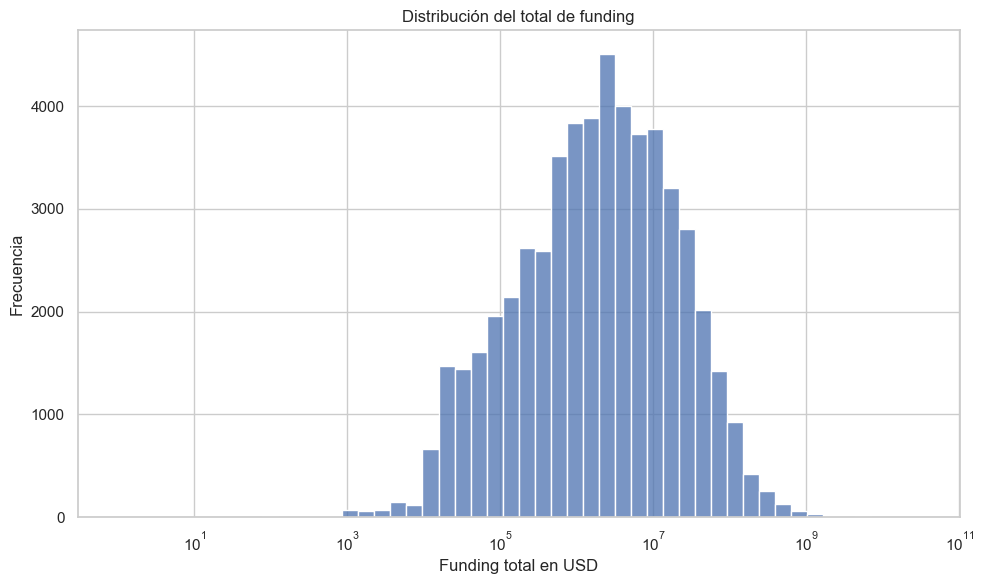

In [131]:
#Distribución del funding total (log scale por outliers)
plt.figure(figsize=(10, 6))
sns.histplot(dfcrunch["funding_total_usd"].dropna(), bins=50, log_scale=True)
plt.title("Distribución del total de funding")
plt.xlabel("Funding total en USD")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

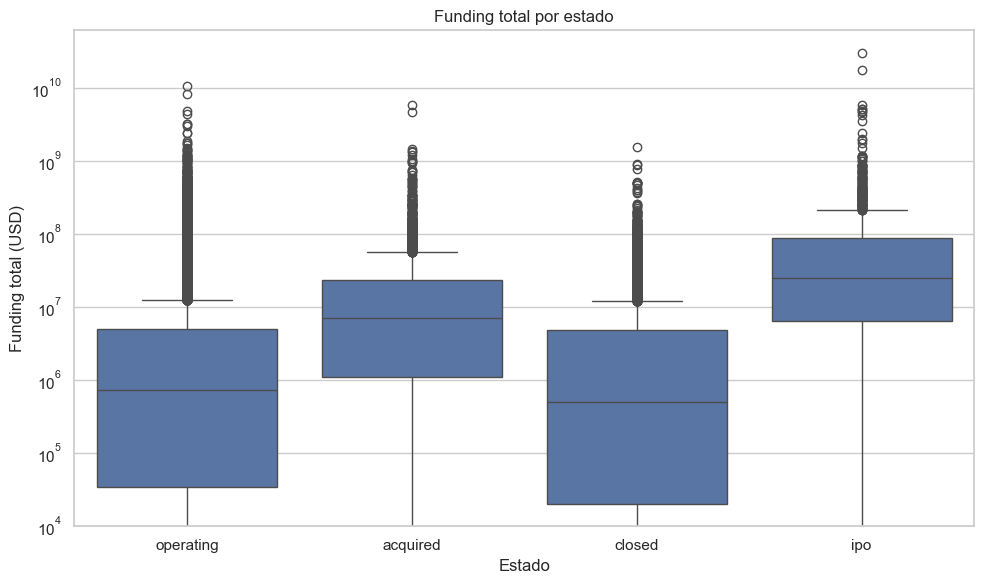

In [132]:
#Funding medio por estado
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfcrunch, x="status", y="funding_total_usd")
plt.yscale("log")
plt.title("Funding total por estado")
plt.xlabel("Estado")
plt.ylabel("Funding total (USD)")
plt.tight_layout()
plt.show()

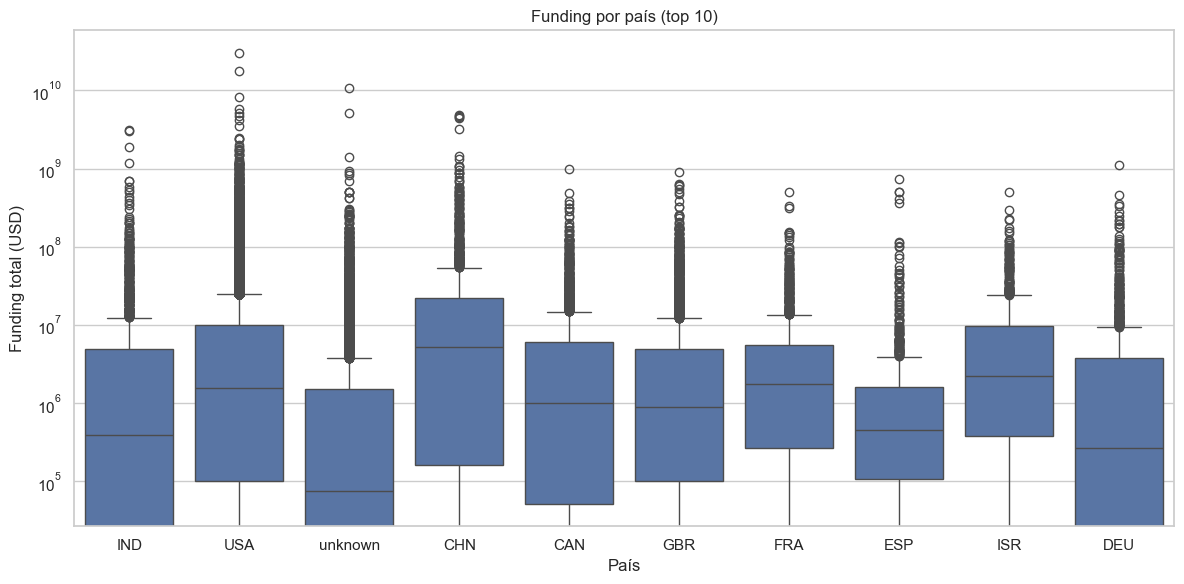

In [134]:
#Funding por país (top 10 países)
plt.figure(figsize=(12, 6))
top_countries = dfcrunch["country_code"].value_counts().head(10).index
sns.boxplot(data=dfcrunch[dfcrunch["country_code"].isin(top_countries)],
            x="country_code", y="funding_total_usd")
plt.yscale("log")
plt.title("Funding por país (top 10)")
plt.xlabel("País")
plt.ylabel("Funding total (USD)")
plt.tight_layout()
plt.show()

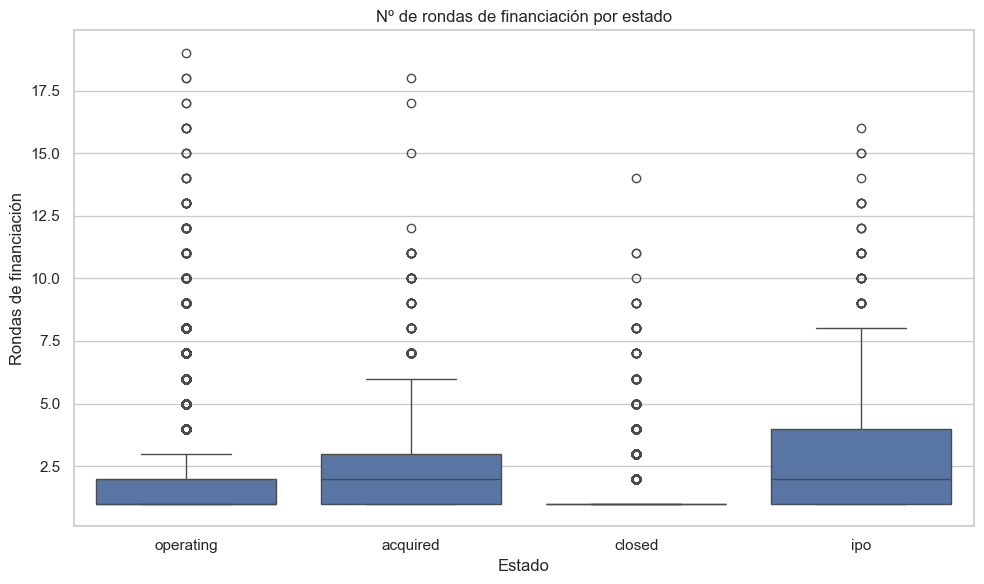

In [136]:
#Rondas de financiación vs status
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfcrunch, x="status", y="funding_rounds")
plt.title("Nº de rondas de financiación por estado")
plt.xlabel("Estado")
plt.ylabel("Rondas de financiación")
plt.tight_layout()
plt.show()

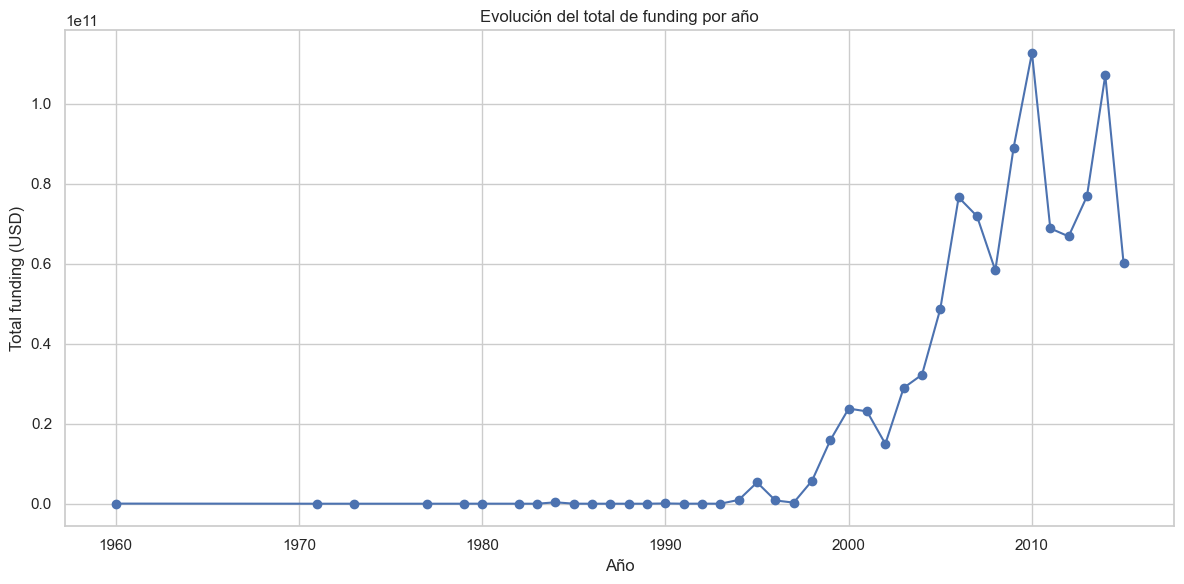

In [138]:
#Evolución del funding en el tiempo
funding_by_year = dfcrunch.groupby(dfcrunch["first_funding_at"].dt.year)["funding_total_usd"].sum()


plt.figure(figsize=(12, 6))
plt.plot(funding_by_year.index, funding_by_year.values, marker="o")
plt.title("Evolución del total de funding por año")
plt.xlabel("Año")
plt.ylabel("Total funding (USD)")
plt.tight_layout()
plt.show()

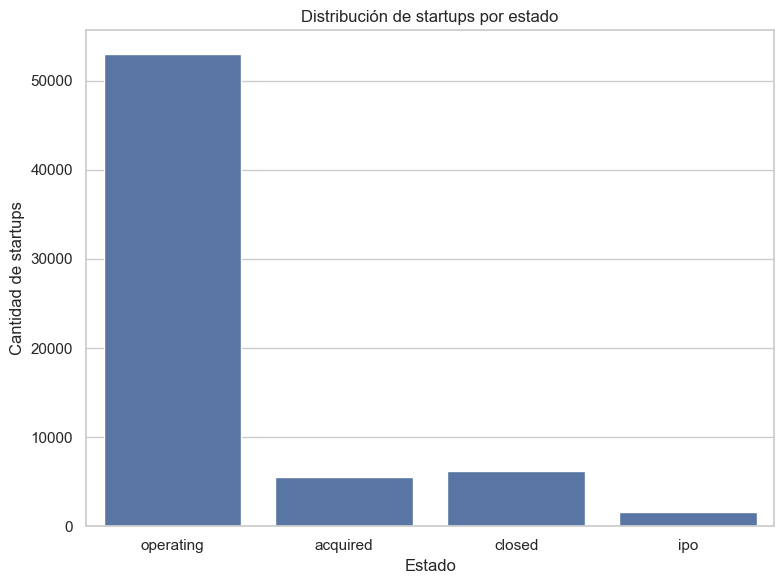

In [139]:
#Conteo de startups por estado
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcrunch, x="status")
plt.title("Distribución de startups por estado")
plt.xlabel("Estado")
plt.ylabel("Cantidad de startups")
plt.tight_layout()
plt.show()

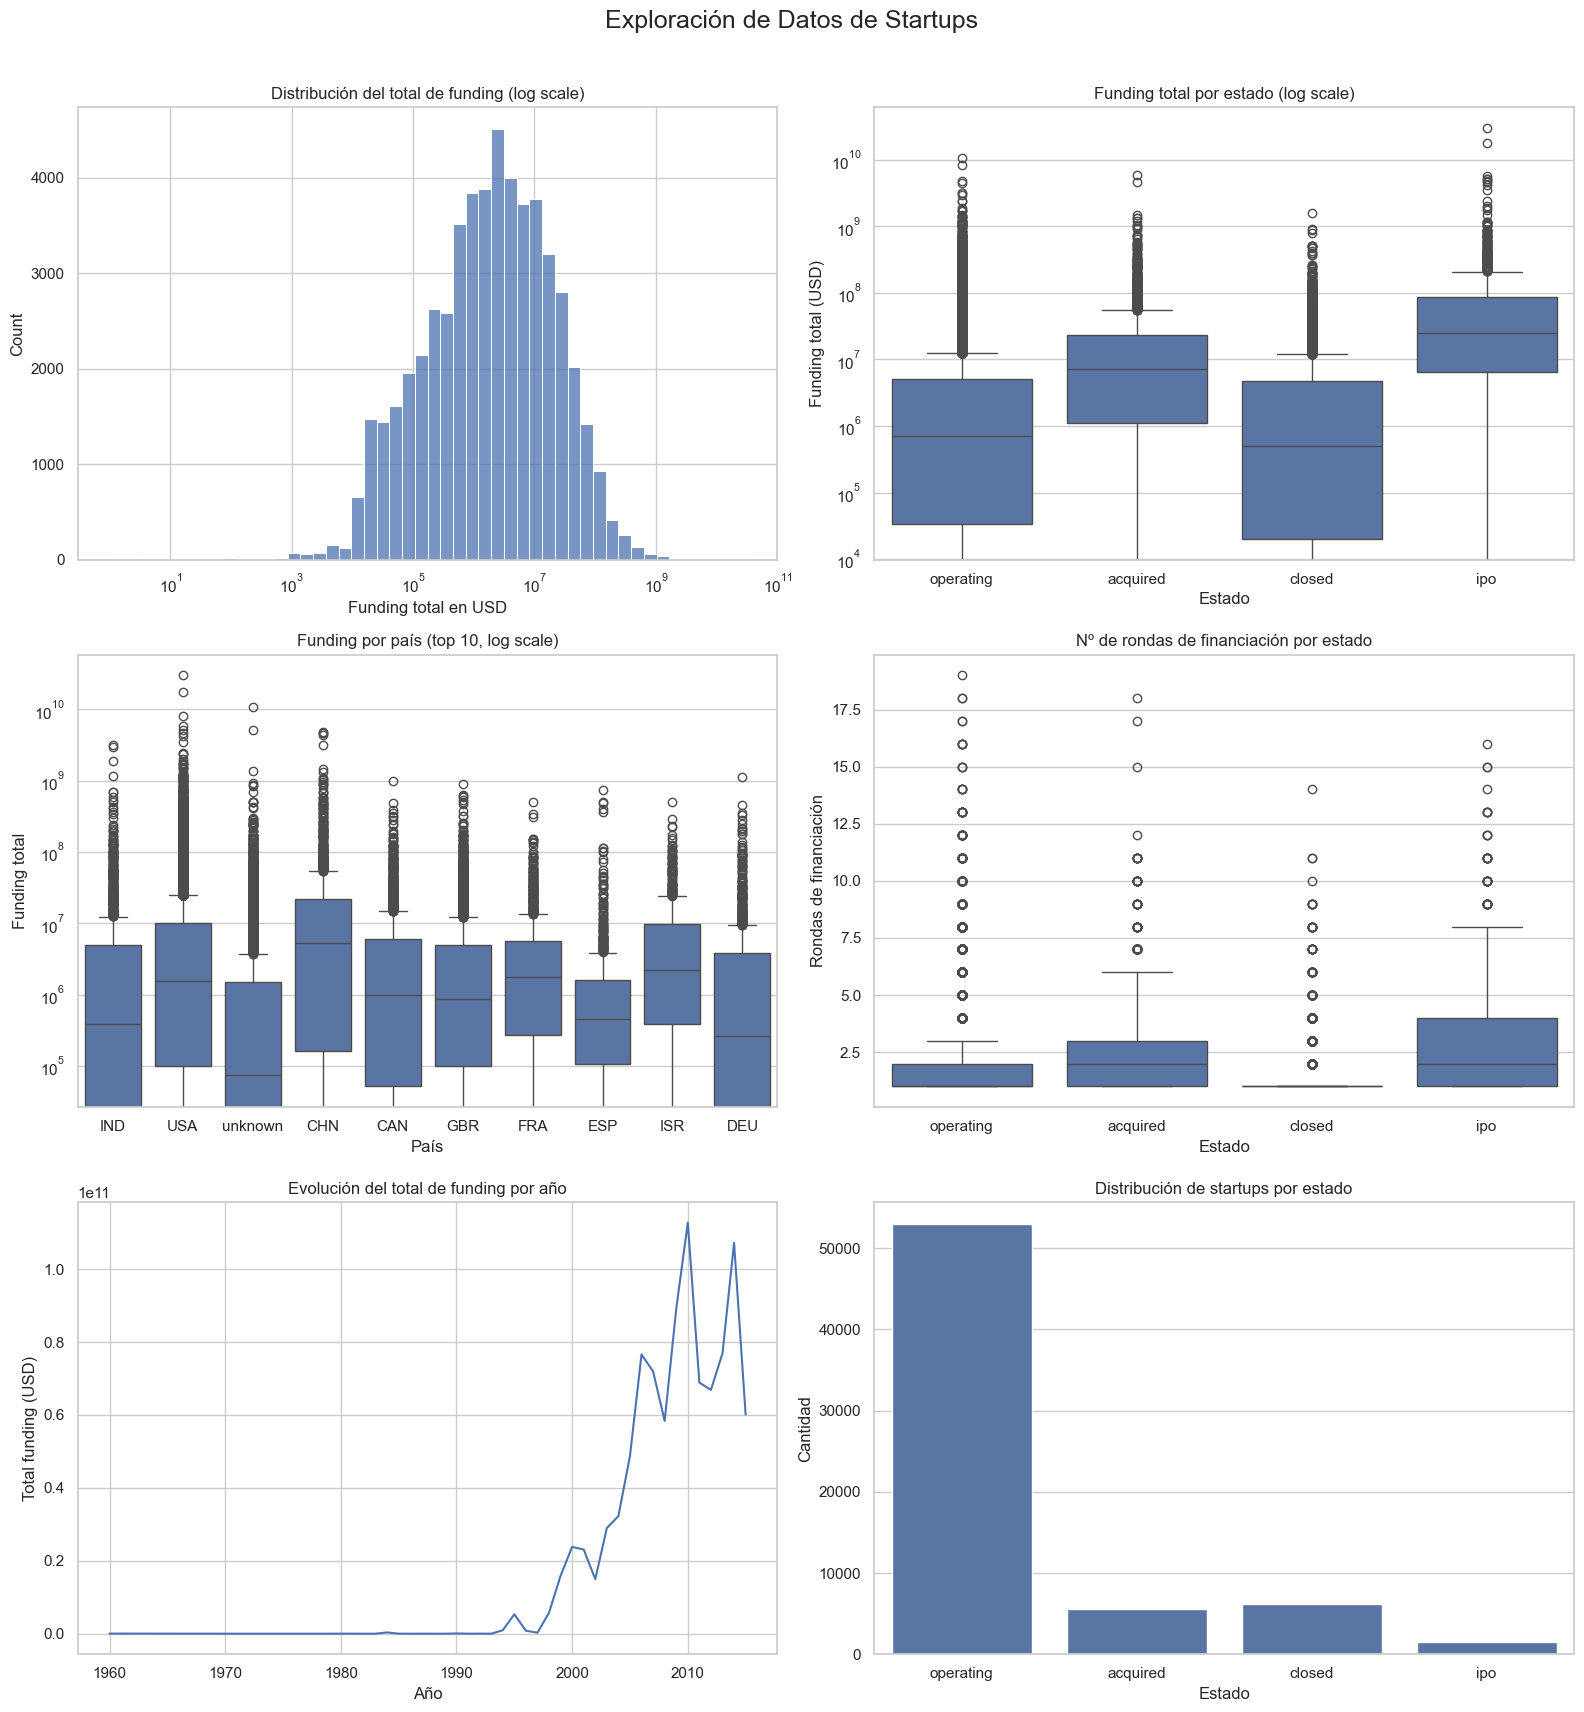

In [123]:

# Ajustes de estilo
sns.set(style="whitegrid")

# Crear subgráficos para visualizar relaciones clave
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Exploración de Datos de Startups", fontsize=18)

# 1. Distribución del funding total (log scale por outliers)
sns.histplot(dfcrunch["funding_total_usd"].dropna(), bins=50, ax=axes[0, 0], log_scale=True)
axes[0, 0].set_title("Distribución del total de funding (log scale)")
axes[0, 0].set_xlabel("Funding total en USD")

# 2. Funding medio por estado
sns.boxplot(data=dfcrunch, x="status", y="funding_total_usd", ax=axes[0, 1])
axes[0, 1].set_yscale("log")
axes[0, 1].set_title("Funding total por estado (log scale)")
axes[0, 1].set_xlabel("Estado")
axes[0, 1].set_ylabel("Funding total (USD)")

# 3. Funding por país (top 10 países)
top_countries = dfcrunch["country_code"].value_counts().head(10).index
sns.boxplot(data=dfcrunch[dfcrunch["country_code"].isin(top_countries)],
            x="country_code", y="funding_total_usd", ax=axes[1, 0])
axes[1, 0].set_yscale("log")
axes[1, 0].set_title("Funding por país (top 10, log scale)")
axes[1, 0].set_xlabel("País")
axes[1, 0].set_ylabel("Funding total")

# 4. Rondas de financiación vs status
sns.boxplot(data=dfcrunch, x="status", y="funding_rounds", ax=axes[1, 1])
axes[1, 1].set_title("Nº de rondas de financiación por estado")
axes[1, 1].set_xlabel("Estado")
axes[1, 1].set_ylabel("Rondas de financiación")

# 5. Evolución del funding en el tiempo
dfcrunch["first_funding_at"] = pd.to_datetime(dfcrunch["first_funding_at"], errors="coerce")
funding_by_year = dfcrunch.groupby(dfcrunch["first_funding_at"].dt.year)["funding_total_usd"].sum()
axes[2, 0].plot(funding_by_year.index, funding_by_year.values)
axes[2, 0].set_title("Evolución del total de funding por año")
axes[2, 0].set_xlabel("Año")
axes[2, 0].set_ylabel("Total funding (USD)")

# 6. Conteo de startups por estado
sns.countplot(data=dfcrunch, x="status", ax=axes[2, 1])
axes[2, 1].set_title("Distribución de startups por estado")
axes[2, 1].set_xlabel("Estado")
axes[2, 1].set_ylabel("Cantidad")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


#### Insights de los graficos


* <b>Distribución de funding_total_usd </b>: está muy sesgada. Hay muchísimas startups con inversiones pequeñas y pocas con inversiones enormes.

* <b>Estado (status) vs. funding </b>: las startups en estado closed tienden a tener menos funding que las que siguen operating, comprensiblemente esto puede deberser a su cese operativo.

* <b> Países top en inversión </b>: USA domina claramente, seguido por algunos países europeos y asiáticos. El funding también varía mucho dentro de cada país.

* <b> Rondas de financiación vs éxito </b>: más rondas no garantizan éxito, pero las empresas operativas tienden a tener más rondas que las cerradas.

* <b> Tendencia temporal </b>: hubo un crecimiento claro del funding total en los últimos años del dataset.

* <b>Distribución por estado </b>: hay más startups en estado operating que closed, pero este balance puede estar sesgado por datos faltantes o empresas recientes.

## Outliers

In [ ]:
#Estadísticas descriptivas básicas para funding_total_usd
funding_desc = dfcrunch["funding_total_usd"].describe()
funding_desc


count    6.634100e+04
mean     1.492327e+07
std      1.691272e+08
min     -1.000000e+00
25%      4.000000e+04
50%      1.000000e+06
75%      6.802465e+06
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [143]:

#Calculamos el rango intercuartílico (IQR)
Q1 = funding_desc["25%"]
Q3 = funding_desc["75%"]
IQR = Q3 - Q1
print(IQR)

6762465.0


In [144]:

#límites para outliers usando 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Contamos cuántos valores están fuera de estos límites
outliers_above = dfcrunch["funding_total_usd"] > upper_bound
outliers_below = dfcrunch["funding_total_usd"] < lower_bound

outlier_summary = {
    "Q1 (25%)": Q1,
    "Q3 (75%)": Q3,
    "IQR": IQR,
    "Límite inferior": lower_bound,
    "Límite superior": upper_bound,
    "Outliers por encima": outliers_above.sum(),
    "Outliers por debajo": outliers_below.sum(),
    "Total de outliers": outliers_above.sum() + outliers_below.sum(),
    "Total registros": dfcrunch.shape[0],
    "Porcentaje de outliers": (outliers_above.sum() + outliers_below.sum()) / dfcrunch.shape[0] * 100
}

outlier_summary

{'Q1 (25%)': np.float64(40000.0),
 'Q3 (75%)': np.float64(6802465.0),
 'IQR': np.float64(6762465.0),
 'Límite inferior': np.float64(-10103697.5),
 'Límite superior': np.float64(16946162.5),
 'Outliers por encima': np.int64(9665),
 'Outliers por debajo': np.int64(0),
 'Total de outliers': np.int64(9665),
 'Total registros': 66341,
 'Porcentaje de outliers': np.float64(14.568667942901072)}

Una parte importante de las startups (casi 1 de cada 7) tiene una inversión muy por encima del rango normal. Debemos tratar estos valores para que no distorsionen el modelo

Vamos a <b> winsorizar </b> estos datos, para reducir el impacto de los valores atípicos sustituyendo los valores extremos por percentiles menos extremos. 
A diferencia de la media aritmética, que considera todos los puntos de datos por igual, la media winsorizada limita la influencia de los valores extremos que pueden distorsionar el resultado global.

La winsorización funciona limitando o sustituyendo los valores que superan un determinado umbral percentil. Por ejemplo, en una winsorización del 5%, el 5% más bajo de los puntos de datos se sustituye por el valor del percentil 5, y el 5% más alto se sustituye por el valor del percentil 95.

In [ ]:

#percentiles
lower_percentile = dfcrunch["funding_total_usd"].quantile(0.01)
upper_percentile = dfcrunch["funding_total_usd"].quantile(0.99)

# Aplicar winsorizacion: limitar los valores fuera del 1% y 99%
dfcrunch["funding_total_usd_winsorized"] = dfcrunch["funding_total_usd"].clip(lower=lower_percentile, upper=upper_percentile)

# Verificamos  la nueva distribución
winsorized_stats = dfcrunch["funding_total_usd_winsorized"].describe()
winsorized_stats


count    6.634100e+04
mean     1.067492e+07
std      2.814815e+07
min     -1.000000e+00
25%      4.000000e+04
50%      1.000000e+06
75%      6.802465e+06
max      1.950000e+08
Name: funding_total_usd_winsorized, dtype: float64

##### Problema: Cambie los datos nulos por -1 y eso hace que no pueda aplicar una winsorizacion correcta

Debo revertir mi cambio y volver a hacer que sea nulo

In [146]:
dfcrunch["funding_total_usd_clean"] = dfcrunch["funding_total_usd"].replace(-1, np.nan)

In [148]:

#Winsorizar sobre la columna limpia
lower_percentile_clean = dfcrunch["funding_total_usd_clean"].quantile(0.01)
upper_percentile_clean = dfcrunch["funding_total_usd_clean"].quantile(0.99)

dfcrunch["funding_total_usd_winsorized"] = dfcrunch["funding_total_usd_clean"].clip(
    lower=lower_percentile_clean,
    upper=upper_percentile_clean
)

#Verificar la nueva distribución sin -1
winsorized_clean_stats = dfcrunch["funding_total_usd_winsorized"].describe()
winsorized_clean_stats


count    5.355800e+04
mean     1.355802e+07
std      3.285242e+07
min      9.795690e+03
25%      3.360000e+05
50%      2.000000e+06
75%      1.000000e+07
max      2.251938e+08
Name: funding_total_usd_winsorized, dtype: float64

Ahora los datos tienen mas sentido:
* Mínimo: ~$9,800 USD

* Mediana: $2 millones

* Máximo: ~$225 millones

* Total de valores válidos: 53,558 startups

Guardamos CSV

In [149]:
dfcrunch.to_csv("crunchbaseeda.csv", index=False)